# Polynomial Curve fitting
<a href="https://colab.research.google.com/github/surajx/AIFS/blob/master/labs/Machine%20Learning/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(8698)

In [57]:
NUM_DATA_POINTS = 20

In [58]:
def data_gen_process(x):
    return np.sin(2*np.pi*x)

def gen_sine_samples(num_samples):
    x = np.sort(np.random.rand(num_samples))
    y = data_gen_process(x) + np.random.normal(0, 0.3, num_samples)
    return x, y

def load_generated_data(num_train_samples=50):
    X_train, y_train = gen_sine_samples(num_train_samples)    

    return X_train, y_train

In [59]:
X, y = load_generated_data(NUM_DATA_POINTS)
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)
Xy = np.hstack((X,y))
np.random.shuffle(Xy)
Xy

array([[ 0.02262274,  0.17098232],
       [ 0.98589719, -0.06737756],
       [ 0.9511711 , -0.76622127],
       [ 0.0734625 ,  0.64667935],
       [ 0.98844503, -0.34335521],
       [ 0.49602692,  0.64338379],
       [ 0.36810818,  0.59538783],
       [ 0.31460586,  0.60377244],
       [ 0.46710835,  0.04256637],
       [ 0.83311486, -0.81048713],
       [ 0.24761538,  0.51580803],
       [ 0.31129   ,  0.76151132],
       [ 0.40003914,  1.15087751],
       [ 0.7598658 , -1.32960882],
       [ 0.76587875, -1.37280862],
       [ 0.79443867, -1.45483751],
       [ 0.2795682 ,  0.49721591],
       [ 0.10627267,  0.92590374],
       [ 0.47687775, -0.09133639],
       [ 0.48125694,  0.2479845 ]])

In [60]:
X_train, y_train = Xy[:10,0], Xy[:10,1]
X_test, y_test = Xy[10:NUM_DATA_POINTS,0], Xy[10:NUM_DATA_POINTS,1]

In [61]:
X_true = np.linspace(0, 1, 1000) # generating 1000 x-valued betweeen 0 and 1
y_true = data_gen_process(X_true) # generating true data (without noise) for X_true

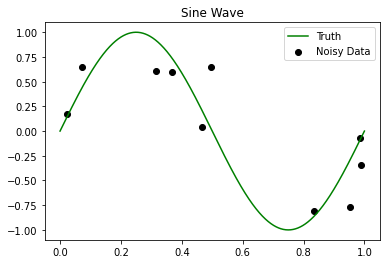

In [62]:
plt.title("Sine Wave")
plt.plot(X_true, y_true, color="green", label="Truth")
plt.scatter(X_train, y_train, color="black", label="Noisy Data")
plt.legend(loc="best");

In [63]:
M_list = range(10)  # [1, ..., 9]

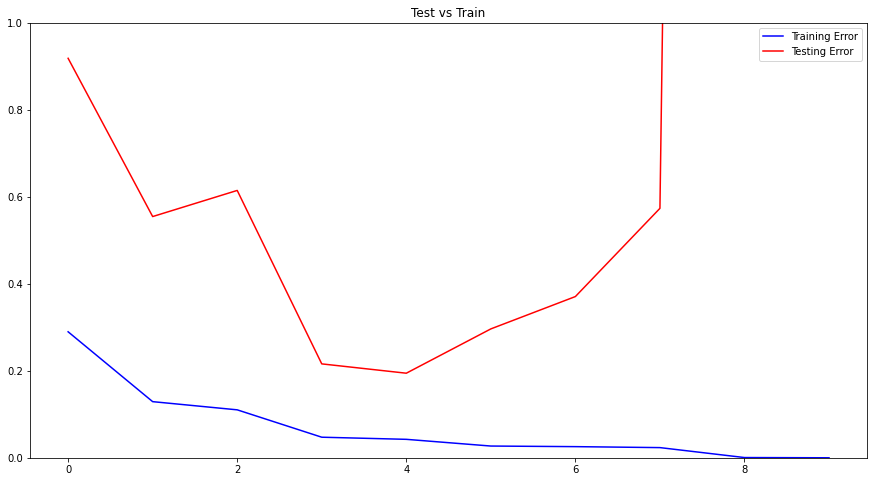

In [64]:
# Define the Order of the polynomial. This defines the Capacity of the Model
w_star_list = []
mse_train_list = []
mse_test_list = []
for M in M_list:

    # Convert to polynomial features
    X_train_features = np.vander(X_train, N=M+1, increasing=True)
    X_test_features = np.vander(X_test, N=M+1, increasing=True)

    # Convert to matrix format for evaluating closed for solution
    y_train_mat = np.expand_dims(y_train, axis=1)
    y_test_mat = np.expand_dims(y_test, axis=1)

    # Evaluate closed-form solution
    X_T_X = np.matmul(X_train_features.T, X_train_features)
    X_T_X_inv = np.linalg.inv(X_T_X)
    X_T_X_inv_X_T = np.matmul(X_T_X_inv, X_train_features.T)
    w_star = X_T_X_inv_X_T_y = np.matmul(X_T_X_inv_X_T, y_train_mat)

    w_star_list.append(w_star)

    y_test_pred = np.matmul(X_test_features, w_star) # Model prediction

    mse_train = np.mean(np.square(np.matmul(X_train_features, w_star) - y_train_mat))
    mse_test = np.mean(np.square(np.matmul(X_test_features, w_star) - y_test_mat))

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

plt.figure(figsize=(15, 8))
plt.title("Test vs Train")
plt.ylim((0, 1))
plt.plot(M_list, mse_train_list, color="blue", label="Training Error")
plt.plot(M_list, mse_test_list, color="red", label="Testing Error")
plt.legend(loc="best");